In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Pull data: Year, player name, position, points, # of Games
col_list = ["Year", "Player", "Rounded Position", "WS"]
df = pd.read_csv("NBA_Season_Data_dataworld.csv", usecols=col_list)
df_cleaned = df.drop(df[df['Year'] == 2016].index)
df_cleaned["Rounded Position"] = df_cleaned["Rounded Position"].replace([1.0,2.0,3.0,4.0,5.0],["Point guard","Shooting guard","Small forward","Power Forward","Center"])


df_cleaned

,Year,Player,WS,Rounded Position
0,1978,Truck Robinson,6.5,Power Forward
1,1978,Randy Smith,7.9,Point guard
2,1978,Elvin Hayes,8.3,Power Forward
3,1978,Dave Cowens,10.8,Power Forward
4,1978,Bob McAdoo,10.9,Power Forward
...,...,...,...,...
16854,2015,Jerrelle Benimon,0.0,Center
16855,2015,Sim Bhullar,0.0,Center
16856,2015,Eric Moreland,0.0,Center
16857,2015,Malcolm Lee,0.0,Shooting guard


In [6]:
# Groupby dataset by year and position
# get the average of WS of each position in each year
avg_WS_of_each_pos= df_cleaned.groupby(["Year","Rounded Position"]).agg({'WS': ['mean']})
WS_Analysis = avg_WS_of_each_pos.reset_index()
WS_Analysis.columns = WS_Analysis.columns.map('|'.join).str.strip('|')
WS_Analysis

,Year,Rounded Position,WS|mean
0,1978,Center,4.930000
1,1978,Point guard,2.290909
2,1978,Power Forward,3.092537
3,1978,Shooting guard,2.893333
4,1978,Small forward,2.353571
...,...,...,...
185,2015,Center,3.159596
186,2015,Point guard,2.160833
187,2015,Power Forward,2.164463
188,2015,Shooting guard,1.453043


In [7]:
# generate the list of position
position_name = WS_Analysis.iloc[:,1].unique()
positions = position_name.tolist()
positions

['Center', 'Point guard', 'Power Forward', 'Shooting guard', 'Small forward']

In [8]:
Year_v = WS_Analysis["Year"]
fig = plt.figure(figsize=(6,3))

<Figure size 432x216 with 0 Axes>

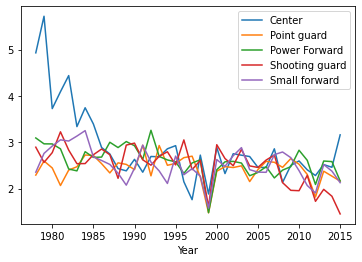

In [9]:
# Line Plot
fig , ax = plt.subplots()
for position , group in WS_Analysis.groupby('Rounded Position'):
    group.plot(x='Year',y='WS|mean',ax =ax,label=position)
plt.show()


In [30]:
#group_by_year_df = WS_Analysis.groupby(['Year'], sort=False)['WS|mean'].max()
most_valuable_position = WS_Analysis.groupby(['Year'])['WS|mean'].transform(max) == WS_Analysis['WS|mean']
MVPosition_by_year = WS_Analysis[most_valuable_position]
MVPosition_by_year

,Year,Rounded Position,WS|mean
0,1978,Center,4.930000
1,1979,Center,5.720000
2,1980,Center,3.726316
3,1981,Center,4.091667
4,1982,Center,4.439130
5,1983,Center,3.337500
6,1984,Center,3.744444
7,1985,Center,3.394286
8,1986,Center,2.886047
9,1987,Power Forward,3.000000


In [142]:
summary_statistics_aggMethod = WS_Analysis.groupby('Rounded Position').agg({'Rounded Position': ['count'],'WS|mean': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_aggMethod

Rounded Position   WS|mean                                \
                            count      mean    median       var       std   
Rounded Position                                                            
Center                         39  2.822874  2.691667  0.798143  0.893389   
Point guard                    39  2.377517  2.457759  0.186465  0.431816   
Power Forward                  39  2.533853  2.587000  0.248372  0.498369   
Shooting guard                 39  2.445132  2.565152  0.306713  0.553817   
Small forward                  39  2.462032  2.480000  0.256825  0.506779   

                            
                       sem  
Rounded Position            
Center            0.143057  
Point guard       0.069146  
Power Forward     0.079803  
Shooting guard    0.088682  
Small forward     0.081150

In [156]:
for position in positions:
    print(f'For {position} position:')
    quartiles = WS_Analysis["WS|mean"].quantile([0.25,0.5,0.75])
    
    first_quartile = quartiles[0.25]
    print(f'The first quartile is: {first_quartile}')
    
    second_quartile = quartiles[0.5]
    print(f'The second quartile is: {second_quartile}')
    
    third_quartile = quartiles[0.75]
    print(f'The third quartile is: {third_quartile}')
    
    IQR = third_quartile - first_quartile
    print(f'The IQR is: {IQR}')

    
    # Determine outliers using upper and lower bounds
    lower_bound = first_quartile - (1.5*IQR)
    upper_bound = third_quartile + (1.5*IQR)
    print(f'If the value lower than {lower_bound} or higher than {upper_bound}, it is a outlier.' )
    print('-----------------------------')
    

For Center position:
The first quartile is: 2.3522650771388496
The second quartile is: 2.539705882352942
The third quartile is: 2.740070921985814
The IQR is: 0.38780584484696456
If the value lower than 1.7705563098684027 or higher than 3.321779689256261, it is a outlier.
-----------------------------
For Point guard position:
The first quartile is: 2.3522650771388496
The second quartile is: 2.539705882352942
The third quartile is: 2.740070921985814
The IQR is: 0.38780584484696456
If the value lower than 1.7705563098684027 or higher than 3.321779689256261, it is a outlier.
-----------------------------
For Power Forward position:
The first quartile is: 2.3522650771388496
The second quartile is: 2.539705882352942
The third quartile is: 2.740070921985814
The IQR is: 0.38780584484696456
If the value lower than 1.7705563098684027 or higher than 3.321779689256261, it is a outlier.
-----------------------------
For Shooting guard position:
The first quartile is: 2.3522650771388496
The second 

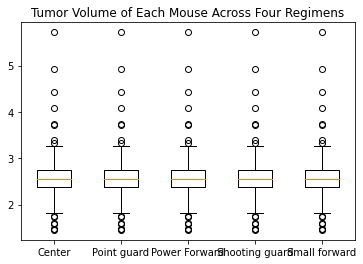

In [227]:
mean_WS_data = []
for position in positions:
    position_played = WS_Analysis.loc[WS_Analysis["Rounded Position"] == position]
    mean_WS_data.append(WS_Analysis["WS|mean"])
    
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse Across Four Regimens')
ax1.boxplot(mean_WS_data)
plt.xticks([1, 2, 3, 4, 5], positions)
plt.show()